# SHAPs

John Curtin, modified by Claire Punturieri  
October 15, 2024

In [ ]:
study <- params$study
cv <- params$cv
algorithms <- params$algorithms
version <- params$version
window <- params$window
model <- params$model


# Set up environment

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
#source(here::here(path_mak, "mak_ema_shaps.R"))

shaps <- read_rds(file.path(path_models, str_c("inner_shaps_", 
                                           window, "_", version, "_", 
                                           cv, "_", model, ".rds"))) |>
  #pivot_longer(cols = starts_with("prob"), 
               #names_to = "method", 
               #values_to = ".pred_Lapse") |>
  glimpse()


Rows: 4,173,193
Columns: 5
Groups: id_obs [11,511]
$ id_obs     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ variable   <fct> p168.raw_duration.risk.medium, p6.diff_duration.risk.high, …
$ value      <dbl> -0.222449977, -0.022518206, 0.039494187, 0.073705416, 0.085…
$ rfvalue    <dbl> 0.000000000, -0.001160714, 0.001160714, 0.000000000, 0.0434…
$ mean_value <dbl> 0.181355553, 0.043778063, 0.167258377, 0.093508345, 0.10053…

Rows: 103,599
Columns: 3
Groups: id_obs [11,511]
$ id_obs       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, …
$ variable_grp <fct> alcohol availability at location, location to avoid in re…
$ value        <dbl> 0.112337563, -0.017883652, 0.004709006, -0.001830503, 0.0…

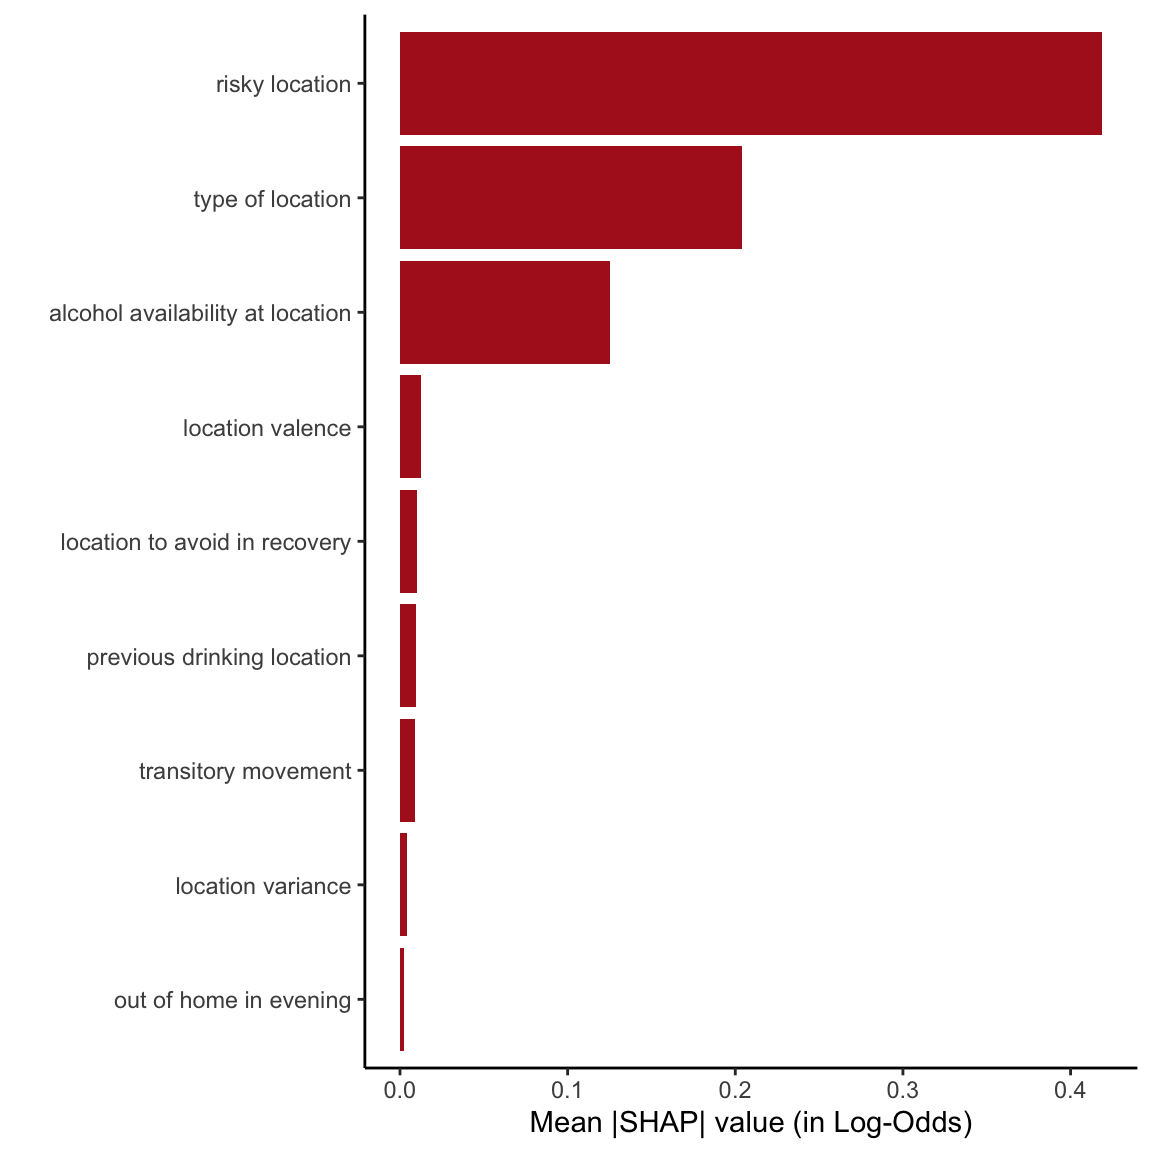

In [ ]:

shaps_grp |>
  group_by(variable_grp) |>
  summarize(mean_value = (mean(abs(value)))) |> 
  mutate(group = reorder(variable_grp, mean_value)) |> #, sum)) |>
  #mutate(window = fct(window, levels = c("week", "day", "hour"))) |> 
  ggplot() +
  geom_bar(aes(x = group, y = mean_value), stat = "identity", fill = "#af1f21") +
  ylab("Mean |SHAP| value (in Log-Odds)") +
  xlab("") +
  coord_flip()
